# Slugging Percentages
## Author: Matthew Chin (2021)

**Data**
https://github.com/chadwickbureau/baseballdatabank

In [ ]:
# plotly standard imports
import plotly.graph_objs as go
import chart_studio.plotly as py

# Cufflinks wrapper on plotly
import cufflinks

# Data science imports
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 999

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# from __future__ import print_function, division
import matplotlib as mpl
import matplotlib.pyplot as plt


from plotly.offline import iplot
cufflinks.go_offline()

# Set global theme
cufflinks.set_config_file(world_readable=True, theme='pearl')

## Slugging Percentage

A batter's slugging percentage involves not only how frequently but how far they get on base when they hit. When they go to bat and they get on base safely with a hit, it increases their chances at getting home. In that case, one's slugging percentage will go up if they hit a single, but goes even farther up if they get on safely with an extra base hit (XBH) or with a home run and touch all four bases. 

Extra base hits and home runs matter for the significance of one's slugging percentage because the power and speed of a batter are considered to know how many bases they touch per at-bat.  

Walks or base on balls (BB) are not considered because they are not hits. 

The formula for slugging is as follows 
(Reference: https://www.mlb.com/glossary/standard-stats/slugging-percentage#:~:text=Definition,hits%20are%20not%20valued%20equally.):

Let $1B$ be a single, $2B$ be a double, $3B$ be a triple, and $HR$ be a home run. 

The formula is:

$SLG = \frac{1B + (2\times2B) + (3\times3B )+ (4\times HR)}{AB}$


In [ ]:
# Get slugging percentages from Batting data
slugpct = pd.read_csv("https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/Batting.csv",sep=',')

In [ ]:
# Get batters who are sluggers from People data
slugppl = pd.read_csv("https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/People.csv",sep=',')

In [ ]:
# Sample of slugpct beginning or end values
# Later cells are the most recent statistics

# slugpct.head()
slugpct.tail()


In [ ]:
# Show dataframe values
slugpct

In [ ]:
# Print array values
slugarr = slugpct.to_numpy()
slugarr

In [ ]:
# Keep these columns names
slugpct.columns

In [87]:
import csv
fcsv = "slugpctAL_2019.csv"
fcsv2 = "slugpctNL_2019.csv"
mean_ba = "mean_ba.csv"
# len(slugpct)
# len(slugarr)

<h1>Abbreviations</h1>

G       Games played<br>
AB      At-bats<br>
R       Runs<br>
H       Hits<br>
B       Singles (1 base)<br>
2B      Doubles (2 bases)<br>
3B      Triples (3 bases)<br>
HR      Home Runs (4 bases)<br>
RBI     Runs Batted In<br>
SB      Stolen Bases<br>
CS      Caught Stealing<br>
BB      Base on Balls/Walks<br>
SO      Struck Out<br>
IBB     Intentional Base on Balls/Intentional Walks<br>
HBP     Hit By Pitch<br>
SH      Sacrifice Bunt<br>
SF      Sacrifice Fly<br>
GIDP    Grounded Into Double Play<br>
BA      Batting Average<br>
SLG     Slugging Percentage<br>
OBP     On-Base Percentage<br>
OPS     On-base percentage Plus Slugging<br>


In [88]:
# Take 2019 data
# Get data from American League (AL) in players with at least 50 ABs & 25 hits
# Write to new CSV file called 'slugpct.csv'

# # old columns:
# 'playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H',
#        '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
#        'SF', 'GIDP'

newrows = ['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 
            'H', 'B', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 
            'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP', 'BA', 'SLG', 'OBP', 'OPS'
            ]

In [89]:
# AL 2019 data
# AL slugging pct in 2019 by players with at least 50 ABs & 25 hits

with open(fcsv, 'w') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(newrows)
    for a in slugarr:
        if a[1] == 2019 and a[4] == 'AL' and a[6] >= 50 and a[8] >= 25:
            slg = ((a[8]-(a[9]+a[10]+a[11])) + (2*a[9]) + (3*a[10]) + (4*a[11]))/a[6]
            bavg = a[8]/a[6]
            obp = (a[8] + a[15] + a[18]) / (a[6] + a[15] + a[18] + a[20])
            ops = obp + slg
            csvwriter.writerow([a[0], a[1], a[2], a[3], a[4], a[5], a[6], a[7], a[8],
                (a[8]-(a[9]+a[10]+a[11])), a[9], a[10], a[11], a[12], a[13], a[14], a[15], 
                a[16], a[17], a[18], a[19], a[20], a[21], 
                bavg, slg, obp, ops])

105

176

170

165

168

164

164

143

168

173

159

166

165

169

166

167

169

171

166

170

172

166

170

172

170

163

167

168

167

170

170

167

167

171

170

169

165

166

166

173

168

171

170

171

165

166

167

172

171

167

167

167

170

165

156

171

165

165

170

172

170

166

165

167

166

169

165

169

167

165

166

168

170

172

173

170

166

150

170

172

171

174

169

170

168

166

171

169

170

167

147

167

168

166

166

149

169

167

169

164

167

161

171

167

170

164

170

171

165

169

164

172

172

166

172

165

155

168

166

164

168

164

167

166

172

168

172

166

167

166

168

171

169

164

167

171

168

146

175

169

172

167

166

167

168

169

165

165

171

168

168

171

171

166

168

169

168

169

167

168

171

170

165

172

171

170

168

168

166

167

167

167

165

126

169

170

170

168

166

174

171

172

174

170

174

166

170

166

168

166

170

157

156

163

166

173

171

165

169

167

164

167

168

164

165

171

165

152

177

157

169

172

173

164

169

170

167

166

169

167

In [90]:
# AL 2019 data in Pandas dataframe

al_sluggers = pd.read_csv(fcsv)
# al_sluggers

In [91]:
# NL 2019 data
# NL slugging pct in 2019 by players with at least 50 ABs & 25 hits


with open(fcsv2, 'w') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(newrows)
    for a in slugarr:   
        if a[1] == 2019 and a[4] == 'NL' and a[6] >= 50 and a[8] >= 25:
            slg = ((a[8]-(a[9]+a[10]+a[11])) + (2*a[9]) + (3*a[10]) + (4*a[11]))/a[6]
            bavg = a[8]/a[6]
            obp = (a[8] + a[15] + a[18]) / (a[6] + a[15] + a[18] + a[20])
            ops = obp + slg
            csvwriter.writerow([a[0], a[1], a[2], a[3], a[4], a[5], a[6], a[7], a[8],
                (a[8]-(a[9]+a[10]+a[11])), a[9], a[10], a[11], a[12], a[13], a[14], a[15], 
                a[16], a[17], a[18], a[19], a[20], a[21], 
                bavg, slg, obp, ops])

105

173

170

166

172

149

172

167

174

172

167

173

175

166

171

170

164

166

167

175

171

169

147

172

170

173

167

164

172

164

169

171

167

168

169

169

165

168

174

171

168

172

144

166

170

167

164

170

151

168

167

166

165

166

165

170

163

172

172

163

167

164

140

174

153

165

173

166

166

168

171

170

164

170

170

175

166

163

169

167

173

167

163

168

171

167

169

164

173

166

165

168

171

169

166

173

167

154

174

172

166

172

167

171

140

165

172

168

171

166

164

167

164

153

170

171

169

171

170

171

169

166

167

165

143

169

166

166

172

171

170

170

164

169

173

165

171

163

167

166

168

174

167

162

153

172

169

167

167

171

165

166

167

170

167

168

169

170

170

172

167

166

167

169

163

169

155

173

153

166

170

174

166

168

170

169

171

156

164

151

166

164

166

173

165

171

171

168

170

167

170

170

168

167

172

172

166

167

164

168

166

171

170

168

167

168

166

171

170

172

165

152

Text(0.5, 0, 'At Bats')

Text(0, 0.5, 'Hits')

Text(0.5, 1.0, 'NL Batters Batting Average, 2019')

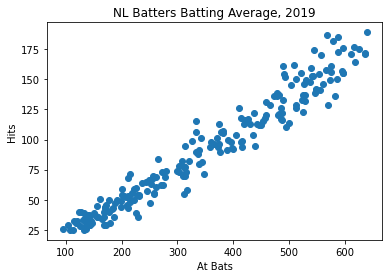

In [92]:
# NL 2019 BA

nl_sluggers = pd.read_csv(fcsv2)
plt.xlabel("At Bats")
plt.ylabel("Hits")
plt.title("NL Batters Batting Average, 2019")
plt.scatter(nl_sluggers.AB, nl_sluggers.H)
plt.show()

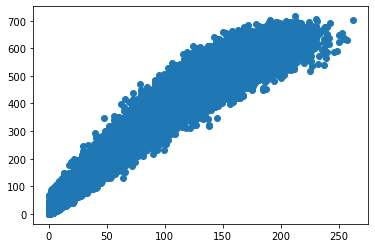

In [93]:
# Test Scatterplot 1
%matplotlib inline

plt.scatter(slugpct.H, slugpct.AB)

Text(0.5, 0, 'At Bats')

Text(0, 0.5, 'Hits')

Text(0.5, 1.0, 'AL Batters Batting Average, 2019')

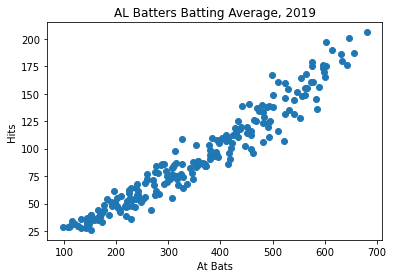

In [94]:
# AL 2019 BA 
plt.xlabel("At Bats")
plt.ylabel("Hits")
plt.title("AL Batters Batting Average, 2019")
plt.scatter(al_sluggers.AB, al_sluggers.H)
plt.show()

In [97]:
# slugpct.yearID
# 150 years total
yr = 1871 # First year statistics were recorded in baseball
slugpct.tail()
# slugarr

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
108784,zimmebr02,2020,1,BAL,AL,2,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
108785,zimmejo02,2020,1,DET,AL,3,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
108786,zimmeky01,2020,1,KCA,AL,16,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
108787,zuberty01,2020,1,KCA,AL,23,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
108788,zuninmi01,2020,1,TBA,AL,28,75,8,11,4,0,4,10.0,0.0,0.0,6,37.0,0.0,3.0,0.0,0.0,0.0


In [98]:
# Calculate the mean batting average of all players in the past 150 MLB seasons

avg_ba = 0
pplct = 0
add_ab = 0
add_h = 0
yr = 1871 
# yr_counter = 0

with open(mean_ba, 'w') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(['Year', 'Total Batters', 'Mean AB', 'Mean H', 'Mean BA'])
    for a in slugarr:
        
        if a[1] == yr:
            pplct += 1
            add_ab += a[6]
            add_h += a[8]
        else:
            csvwriter.writerow([yr, pplct, add_ab, add_h, add_h/add_ab])
            yr += 1
            avg_ba = 0
            pplct = 0
            add_ab = 0
            add_h = 0
    avg_ba = 0
    pplct = 0
    add_ab = 0
    add_h = 0
    for a in slugarr:
        if a[1] == 2020:
            pplct += 1
            add_ab += a[6]
            add_h += a[8]
    csvwriter.writerow([yr, pplct, add_ab, add_h, add_h/add_ab])


43

41

40

40

40

41

40

39

39

41

41

41

42

42

43

42

42

42

42

42

42

42

42

42

41

41

41

40

42

41

42

41

41

42

41

41

41

41

42

42

42

41

42

42

42

42

42

42

41

42

41

41

41

42

42

41

42

42

42

42

41

42

41

41

41

42

42

41

42

42

42

41

41

42

41

42

41

41

42

42

42

41

41

41

42

41

42

41

42

41

42

42

42

43

43

41

43

43

42

43

42

43

43

42

43

43

42

43

42

42

43

41

43

44

41

43

43

43

43

44

43

43

43

43

44

44

42

43

41

44

44

44

43

43

44

43

43

43

44

43

44

44

43

44

43

43

43

44

43

44

42

In [99]:
year_ba = pd.read_csv(mean_ba)
year_ba.tail()

,Year,Total Batters,Mean AB,Mean H,Mean BA
145,2016,1482,165560,42276,0.255352
146,2017,1493,165567,42215,0.254972
147,2018,1534,164933,40886,0.247895
148,2019,1568,166651,42039,0.252258
149,2020,1360,59030,14439,0.244604


Text(0.5, 1.0, 'Leaguewide Batting Average')

Text(0.5, 0, 'Year of Season')

Text(0, 0.5, 'Mean Batting Average')

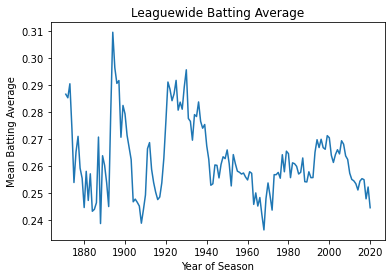

In [100]:
# Show mean batting average in line graph

%matplotlib inline
plt.plot(year_ba['Year'], year_ba['Mean BA'])
plt.title("Leaguewide Batting Average")
plt.xlabel("Year of Season")
plt.ylabel("Mean Batting Average")
plt.show()



<h1>On-Base Percentage (OBP)</h1>

On-Base Percentage (OBP) is a batter's average of how often they get on base. Statistics not only include hits and extra base hits, but consider walks (base on balls/BBs), intentional walks (IBBs), hit-by-pitches (HBPs), and sacrifice flies (SFs).

Equation:
OBP = (Hits + Walks + Hit by Pitch) / (At Bats + Walks + Hit by Pitch + Sacrifice Flies) 

$OBP = \frac{H + BB + HBP}{AB + BB + HBP + SF}$


In [121]:
# Take Brandon Crawford's (SF; 'crawfbr01') stats
# 10 years of stats, make array of size 10
bcraw_stats = [None] * 10
counter = 0

for a in slugarr:
    if a[0] == 'crawfbr01':
        bcraw_stats[counter] = a
        # print(a)
        counter+=1
# bcraw_stats.loc
# # Add 2021 stats[
# bc35_stats_21 = [array(['crawfbr01', 2021, 1, 'SFN', 'NL', 138, 483, 79, 144, 30, 3, 24, 90, 11, 3, 56, 105, 6, 5, 0, 5, 8])]

# bcraw_stats[10] = bc35_stats_21
# bcraw_stats


We will use Brandon Crawford's statistics from the 2011 to 2020 seasons. He is a shortstop for the San Francisco Giants.

To calculate Crawford's career slugging percentage, we will take the hits, walks, hit-by-pitches, at-bats, and sacrifice flies in his career.

In [122]:
bc35_stats = pd.DataFrame(bcraw_stats)
bc35_stats.rename(columns={0:'playerID', 1:'yearID', 2:'stint', 3:'teamID', 4:'lgID', 5:'G', 6:'AB', 7:'R', 8:'H',
       9:'2B', 10:'3B', 11:'HR', 12:'RBI', 13:'SB', 14:'CS', 15:'BB', 16:'SO', 17:'IBB', 18:'HBP', 19:'SH',
       20:'SF', 21:'GIDP'}, inplace=True)


# bc35_stats.append(bc35_stats_21)
bc35_stats

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,crawfbr01,2011,1,SFN,NL,66,196,22,40,5,2,3,21.0,1.0,3.0,23,31.0,1.0,0.0,1.0,0.0,4.0
1,crawfbr01,2012,1,SFN,NL,143,435,44,108,26,3,4,45.0,1.0,4.0,33,95.0,6.0,3.0,2.0,3.0,4.0
2,crawfbr01,2013,1,SFN,NL,149,499,52,124,24,3,9,43.0,1.0,2.0,42,96.0,6.0,5.0,1.0,3.0,10.0
3,crawfbr01,2014,1,SFN,NL,153,491,54,121,20,10,10,69.0,5.0,3.0,59,129.0,10.0,2.0,2.0,10.0,4.0
4,crawfbr01,2015,1,SFN,NL,143,507,65,130,33,4,21,84.0,6.0,4.0,39,119.0,9.0,11.0,0.0,4.0,18.0
5,crawfbr01,2016,1,SFN,NL,155,553,67,152,28,11,12,84.0,7.0,0.0,57,115.0,10.0,4.0,0.0,9.0,13.0
6,crawfbr01,2017,1,SFN,NL,144,518,58,131,34,1,14,77.0,3.0,5.0,42,113.0,3.0,1.0,0.0,9.0,18.0
7,crawfbr01,2018,1,SFN,NL,151,531,63,135,28,2,14,54.0,4.0,5.0,50,122.0,13.0,8.0,0.0,5.0,12.0
8,crawfbr01,2019,1,SFN,NL,147,500,58,114,24,2,11,59.0,3.0,2.0,53,117.0,5.0,3.0,0.0,4.0,10.0
9,crawfbr01,2020,1,SFN,NL,54,172,26,44,12,0,8,28.0,1.0,2.0,15,47.0,2.0,4.0,0.0,2.0,3.0


In [123]:
bc35_stats.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,10.00000,10.0,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.0000,10.000000
mean,2015.50000,1.0,130.500000,440.200000,50.900000,109.900000,23.400000,3.800000,10.600000,56.400000,3.200000,3.000000,41.300000,98.400000,6.500000,4.10000,0.600000,4.9000,9.600000
std,3.02765,0.0,37.488517,138.519794,15.701734,37.746081,9.033272,3.705851,5.211099,22.331841,2.250926,1.563472,14.430292,33.257246,3.922867,3.28126,0.843274,3.3483,5.738757
min,2011.00000,1.0,54.000000,172.000000,22.000000,40.000000,5.000000,0.000000,3.000000,21.000000,1.000000,0.000000,15.000000,31.000000,1.000000,0.00000,0.000000,0.0000,3.000000
25%,2013.25000,1.0,143.000000,449.000000,46.000000,109.500000,21.000000,2.000000,8.250000,43.500000,1.000000,2.000000,34.500000,95.250000,3.500000,2.25000,0.000000,3.0000,4.000000
50%,2015.50000,1.0,145.500000,499.500000,56.000000,122.500000,25.000000,2.500000,10.500000,56.500000,3.000000,3.000000,42.000000,114.000000,6.000000,3.50000,0.000000,4.0000,10.000000
75%,2017.75000,1.0,150.500000,515.250000,61.750000,130.750000,28.000000,3.750000,13.500000,75.000000,4.750000,4.000000,52.250000,118.500000,9.750000,4.75000,1.000000,8.0000,12.750000
max,2020.00000,1.0,155.000000,553.000000,67.000000,152.000000,34.000000,11.000000,21.000000,84.000000,7.000000,5.000000,59.000000,129.000000,13.000000,11.00000,2.000000,10.0000,18.000000


In [124]:
bc_ab = bc35_stats['AB'].sum()
bc_h = bc35_stats['H'].sum()
bc_b = bc_h - (bc35_stats['2B'].sum() + bc35_stats['3B'].sum() + bc35_stats['HR'].sum())
bc_hbp = bc35_stats['HBP'].sum()
bc_bb = bc35_stats['BB'].sum()
bc_sf = bc35_stats['SF'].sum()


In [125]:
bc_obp = (bc_h + bc_bb + bc_hbp) / (bc_ab + bc_bb + bc_hbp + bc_sf)
print("Crawford career OBP:",bc_obp)

Crawford career OBP: 0.3166156982670744


In [ ]:
# OBP over career
bc_obp = (bc_h + bc_bb + bc_hbp) / (bc_ab + bc_bb + bc_hbp + bc_sf)

<h1>On-Base Plus Slugging (OPS)</h1>

On-base Plus Slugging (OPS) is a percentage statistic commonly used in Sabermetrics to determine how much of an impact that a baseball player has on their team in terms of scoring and generating baserunners to get to home plate and score. 

Generally, an OPS percentage of $.800$ is a bare minimum for most MLB All-Stars; winners of the American League or National League Most Valuable Player Awards given at the end of each season usually have OPS of a range between at least .920 and 1.000 in that season.

$OPS = OBP + SLG$

We will continue to use Brandon Crawford's stats. 

In [126]:
bc_slg = (bc_b + (2*bc35_stats['2B'].sum()) + (3*bc35_stats['3B'].sum()) + (4*bc35_stats['HR'].sum())) / bc_ab

print("Crawford career OBP:",bc_obp, 
"\nCrawford career SLG:", bc_slg, 
"\nCrawford career OPS:", bc_obp + bc_slg)

Crawford career OBP: 0.3166156982670744 
Crawford career SLG: 0.3923216719672876 
Crawford career OPS: 0.708937370234362
